<a href="https://colab.research.google.com/github/WassimRadwan/Wassim-Radwan-Streamlit-/blob/main/FinalCapstoneProject(UofT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Executive Summary***

---


The objective of this project was to develop a predictive model to identify potential customers who are likely to accept a personal loan offer. The dataset used for this analysis contained information on various customer attributes, such as age, income, experience, and credit card average, etc. The project was conducted in several stages, including data exploration, preprocessing, feature
engineering, model training, and evaluation. After testing the prediction performance of multiple models, the Random Forest algorithm exhibited the best overall performance in predicting personal loan acceptance.

---



In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Import dataset
path = "/content/drive/MyDrive/Dataset/Bank.csv"
df = pd.read_csv(path)

#Part A: Data Cleaning and Basic Data Exploration



##Basic Data Exploration

In [ ]:
# To check how many rows (records) and columns (variables) are in the dataset
df.shape

(4499, 17)

In [ ]:
# Chect the first 5 rows in the dataset
df.head()

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.


In [ ]:
# Chect the last 5 rows in the dataset
df.tail()

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
4498,60,34,38,7041 East Mammoth Drive,3,2.2,0,0,1,0,0,0,Cecil Caves,PFP,7041 East Mammoth Drive,597 Lawrence Street,9929 Thompson Lane


In [ ]:
# Display summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4499 non-null   int64 
 1   Experience           4499 non-null   int64 
 2   Income               4499 non-null   int64 
 3   Branch Address       4499 non-null   object
 4   Family               4499 non-null   int64 
 5   CCAvg                4499 non-null   object
 6   Mortgage             4499 non-null   int64 
 7   Personal Loan        4499 non-null   int64 
 8   Brokerage Account    4499 non-null   int64 
 9   GIC Account          4499 non-null   int64 
 10  Online               4499 non-null   int64 
 11  CreditCard           4499 non-null   int64 
 12  Advisor Name         4499 non-null   object
 13  Advisor Designation  4499 non-null   object
 14  Branch Address 1     4499 non-null   object
 15  Branch Address 2     4499 non-null   object
 16  Branch

Everything seems to be in order except for the CCAvg variable. It should be a classified as a float(decimal) data type however it is classified as an object.

In [ ]:
# Generate descriptive statistics of numerical columns
df.describe()

,Age,Experience,Income,Family,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.461481,46.310561,1.147040,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Everything seems to be in order except for Experience which is the number of years of professional experience. The minimum value of Experience is negative (-3) which is wrong since number of years cannot be negative.

##Data Cleaning

In [ ]:
# Convert the CCAvg variable from a string (object) to a decimal (float)
df['CCAvg'] = df['CCAvg'].astype(float)

ValueError: ignored

It appears we have an invalid value (-2,00). Hence, the code doesn't work.

In [ ]:
# Replace the comma with a period, then convert the variable (column) into a float
df['CCAvg'] = df['CCAvg'].str.replace(',', '.').astype(float)

In [ ]:
# Check the data type of CCAvg to ensure it has been successfully converted
print(df['CCAvg'].dtype)

float64


The conversion has been successful.

In [ ]:
# Identify columns with missing values
df.isnull().sum()

Age                    0
Experience             0
Income                 0
Branch Address         0
Family                 0
CCAvg                  0
Mortgage               0
Personal Loan          0
Brokerage Account      0
GIC Account            0
Online                 0
CreditCard             0
Advisor Name           0
Advisor Designation    0
Branch Address 1       0
Branch Address 2       0
Branch Address 3       0
dtype: int64

The dataset has no missing values.

In [ ]:
# Check if the dataset contains duplicate rows
df.duplicated().sum()

1

In [ ]:
# Extract duplicate rows
df.loc[df.duplicated(), :]

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
1796,38,8,21,336 Pin Oak Ave.,1,0.666667,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


In [ ]:
# Remove duplicate rows
df.drop_duplicates()

,Age,Experience,Income,Branch Address,Family,CCAvg,Mortgage,Personal Loan,Brokerage Account,GIC Account,Online,CreditCard,Advisor Name,Advisor Designation,Branch Address 1,Branch Address 2,Branch Address 3
0,50,24,11,234 Blue Spring Rd.,4,0.6,0,0,0,0,0,1,Carolin Whitmire,PFP,234 Blue Spring Rd.,533 Hillcrest Street,94 Country Club St.
1,31,7,173,218 S. Westport Court,1,6.0,0,0,0,0,1,0,Marylee Bristow,PFP,218 S. Westport Court,9587 SW. Jefferson Street,9670 Wilson Rd.
2,41,16,10,9834 East Pineknoll Ave.,2,0.3,0,0,0,0,1,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street
3,53,27,44,7330 West Grand St.,4,1.5,0,0,0,0,0,0,Beatriz Rolf,PFP,7330 West Grand St.,91 Lake Court,7041 East Mammoth Drive
4,29,5,33,36 Kent Court,1,1.8,78,0,0,0,1,0,Zofia Rambo,PFP,40 E. Dunbar Ave.,36 Kent Court,69 Spruce Dr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,57,33,43,336 Pin Oak Ave.,1,1.8,0,0,0,0,0,0,Ross Seipel,PFP,8376 Euclid Lane,336 Pin Oak Ave.,9834 East Pineknoll Ave.
4495,62,37,19,9670 Wilson Rd.,3,0.5,89,0,0,0,0,0,Weston Jeon,PFP,9587 SW. Jefferson Street,9670 Wilson Rd.,76 Mayfair St.
4496,29,3,53,387 West Fifth Ave.,4,1.8,0,0,0,0,1,0,Aleida Suitt,PFP,387 West Fifth Ave.,8536 Country Club Dr.,234 Blue Spring Rd.
4497,42,18,43,336 Pin Oak Ave.,1,0.7,136,0,0,0,0,0,Corazon Eastin,PFP,336 Pin Oak Ave.,9834 East Pineknoll Ave.,742 Bridle Street


The row has been succesfully dropped since we originally had 4499 rows, but now the dataset has 4498 rows.

In [ ]:
# Convert all values in the Experience column to be non-negative (or replace all negative values with 0)
df['Experience'] = df['Experience'].clip(lower=0)

In [ ]:
# To check the number of negative values in the Experience column
print((df['Experience'] < 0).sum())

0


The Experience variable contains no negative values.

We need to create a new column called MortgageAmount to facilitate in distinguishing between actual mortgage amounts and cases where there is no mortgage (which are represented by 0):

In [ ]:
# Create a new column called MortgageAmount
df["MortgageAmount"] = df['Mortgage'].replace(0, np.nan)

In [ ]:
# Generate descriptive statistics
df["MortgageAmount"].describe()

count    1370.000000
mean      184.181752
std       102.134723
min        75.000000
25%       109.000000
50%       152.500000
75%       229.000000
max       617.000000
Name: MortgageAmount, dtype: float64

In [ ]:
print(df["MortgageAmount"])

0         NaN
1         NaN
2         NaN
3         NaN
4        78.0
        ...  
4494      NaN
4495     89.0
4496      NaN
4497    136.0
4498      NaN
Name: MortgageAmount, Length: 4499, dtype: float64


In [ ]:
# Create a binary variable called MortgagePresent to see which customer has ongoing mortgages and which do not.
df["MortgagePresent"] = df["Mortgage"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
print(df["MortgagePresent"])

0       0
1       0
2       0
3       0
4       1
       ..
4494    0
4495    1
4496    0
4497    1
4498    0
Name: MortgagePresent, Length: 4499, dtype: int64


In [ ]:
# To check the created columns in the dataframe
print(df)

      Age  Experience  Income            Branch Address  Family  CCAvg  \
0      50          24      11       234 Blue Spring Rd.       4    0.6   
1      31           7     173     218 S. Westport Court       1    6.0   
2      41          16      10  9834 East Pineknoll Ave.       2    0.3   
3      53          27      44       7330 West Grand St.       4    1.5   
4      29           5      33             36 Kent Court       1    1.8   
...   ...         ...     ...                       ...     ...    ...   
4494   57          33      43          336 Pin Oak Ave.       1    1.8   
4495   62          37      19           9670 Wilson Rd.       3    0.5   
4496   29           3      53       387 West Fifth Ave.       4    1.8   
4497   42          18      43          336 Pin Oak Ave.       1    0.7   
4498   60          34      38   7041 East Mammoth Drive       3    2.2   

      Mortgage  Personal Loan  Brokerage Account  GIC Account  Online  \
0            0              0         

In [ ]:
# How many customers have mortgages(1) and don't have mortgages(0)
df["MortgagePresent"].value_counts()

0    3129
1    1370
Name: MortgagePresent, dtype: int64

It appears 3129 customers do not have mortgages whereas 1370 customers do have mortgages,

Now, we must transform skewed data into normal data. In this case, we are going to use logarithmic transformation and square root transformation to render this.

In [ ]:
# Create a subset of quantitative (i.e., numerical aka continuous) variables
num = df[['Age', 'Experience', 'Income','CCAvg', 'MortgageAmount']]

In [ ]:
# Check skew
skew = num.skew()
print(skew)

Age              -0.015910
Experience       -0.004111
Income            0.820516
CCAvg             1.573988
MortgageAmount    1.541646
dtype: float64


In [ ]:
# Check kurtosis
kurt = num.kurt()
print(kurt)

Age              -1.153270
Experience       -1.136828
Income           -0.104670
CCAvg             2.548578
MortgageAmount    2.464204
dtype: float64


**Interpretations on Skewness:**

---



Age: The skewness value of -0.015910 indicates a nearly symmetrical distribution. The data is relatively balanced in terms of skewness.

Experience: The skewness value of -0.004111 also suggests a nearly symmetrical distribution. Similar to the "Age" variable, the data is relatively balanced in terms of skewness.

Income: The skewness value of 0.820516 indicates right-skewness. The distribution has a longer tail on the right side, indicating a few high-income outliers or a concentration of lower-income values.

CCAvg: The skewness value of 1.573988 suggests significant right-skewness. The distribution has a longer tail on the right side, indicating a few individuals with very high credit card spending. This variable may require transformation to achieve a more symmetrical distribution.

MortgageAmount: The skewness value of 1.541646 also indicates significant right-skewness. Similar to the "CCAvg" variable, the distribution has a longer tail on the right side, suggesting a few individuals with high mortgage amounts. This variable may also benefit from transformation to normalize the distribution.

**Interpretions on Kurtosis:**

---


Age: The kurtosis value of -1.153270 suggests a distribution with lighter tails compared to a normal distribution. This means the distribution has fewer outliers compared to a normal distribution.

Experience: The kurtosis value of -1.136828 also indicates a distribution with lighter tails compared to a normal distribution. Similar to the "Age" variable, the distribution has fewer outliers.

Income: The kurtosis value of -0.104670 suggests a distribution with similar tail behavior as a normal distribution. The distribution has a relatively normal amount of outliers compared to a normal distribution.

CCAvg: The kurtosis value of 2.548578 indicates a distribution with heavier tails and more outliers compared to a normal distribution. This suggests the presence of extreme values or a concentration of high credit card spending.

MortgageAmount: The kurtosis value of 2.464204 also suggests a distribution with heavier tails and more outliers compared to a normal distribution. Similar to the "CCAvg" variable, the distribution has a concentration of high mortgage amounts or extreme values.


Age                  Axes(0.125,0.712609;0.227941x0.167391)
Experience        Axes(0.398529,0.712609;0.227941x0.167391)
Income            Axes(0.672059,0.712609;0.227941x0.167391)
CCAvg                Axes(0.125,0.511739;0.227941x0.167391)
MortgageAmount    Axes(0.398529,0.511739;0.227941x0.167391)
dtype: object

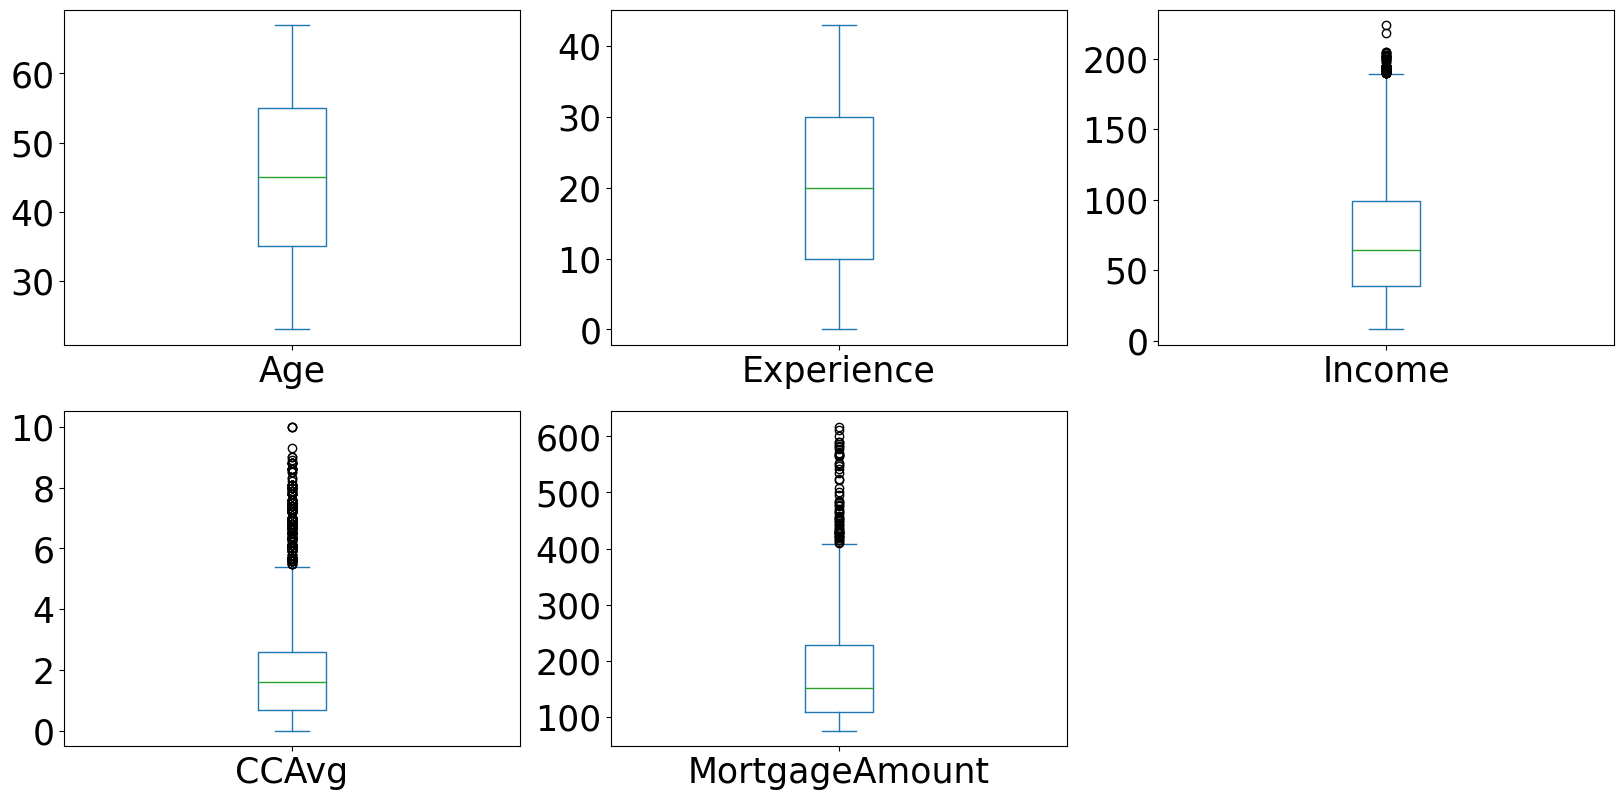

In [ ]:
# Boxplots
num.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,20), fontsize = 25)

The boxplots confirm the presence of outliers in the Income, CCAvg and MortgageAmount variables.

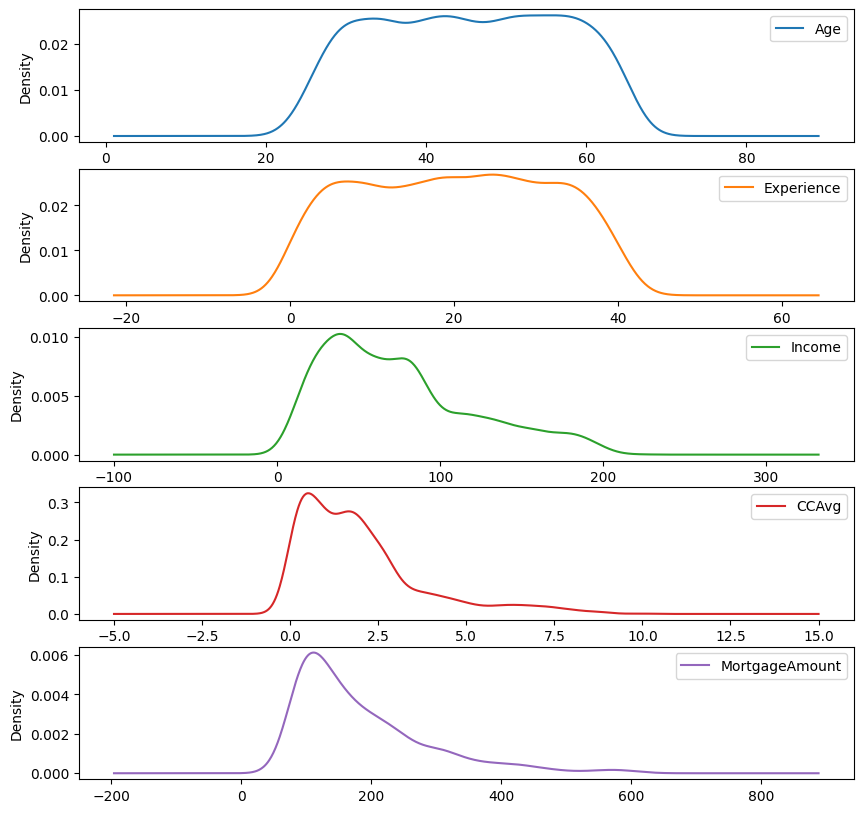

In [ ]:
# Density plots
num.plot(kind = 'density', subplots = True, layout = (5,1), sharex = False, sharey = False, figsize=(10,10), fontsize = 10)
plt.legend()
plt.rc('legend', fontsize=10)

The density plots confirm that the variables Income, CCAvg, and MortgageAmount are positively skewed.

In [ ]:
# Square root transformation of the variable Income since it has a moderate positive skew
df["Income_sqrt"] = np.sqrt(df["Income"])

In [ ]:
# Check the skewness of the transformed variable
print(df["Income_sqrt"].skew())

0.24753825394502563


In [ ]:
# Logarithmic transformation of the variable CCAvg since it has a large positive skew
df["CCAvg_log"] = np.log1p(df["CCAvg"])

In [ ]:
# Check the skewness of the transformed variable
print(df["CCAvg_log"].skew())

0.30352599454434515


In [ ]:
# Logarithmic transformation of the variable MortgageAmount since it has a large positive skew
df["MortgageAmount_log"] = np.log1p(df["MortgageAmount"])

In [ ]:
# Check the skewness of the transformed variable
print(df["MortgageAmount_log"].skew())

0.4927285865241491


It appears the transformations have reduced the level of skewness of the aformentioned variables. Lets verify this through visualizations, mainly via boxplots and density plots.

In [ ]:
# Create a subset of transformed variables
trans_num = df[["MortgageAmount_log", "CCAvg_log", "Income_sqrt"]]

MortgageAmount_log       Axes(0.125,0.712609;0.227941x0.167391)
CCAvg_log             Axes(0.398529,0.712609;0.227941x0.167391)
Income_sqrt           Axes(0.672059,0.712609;0.227941x0.167391)
dtype: object

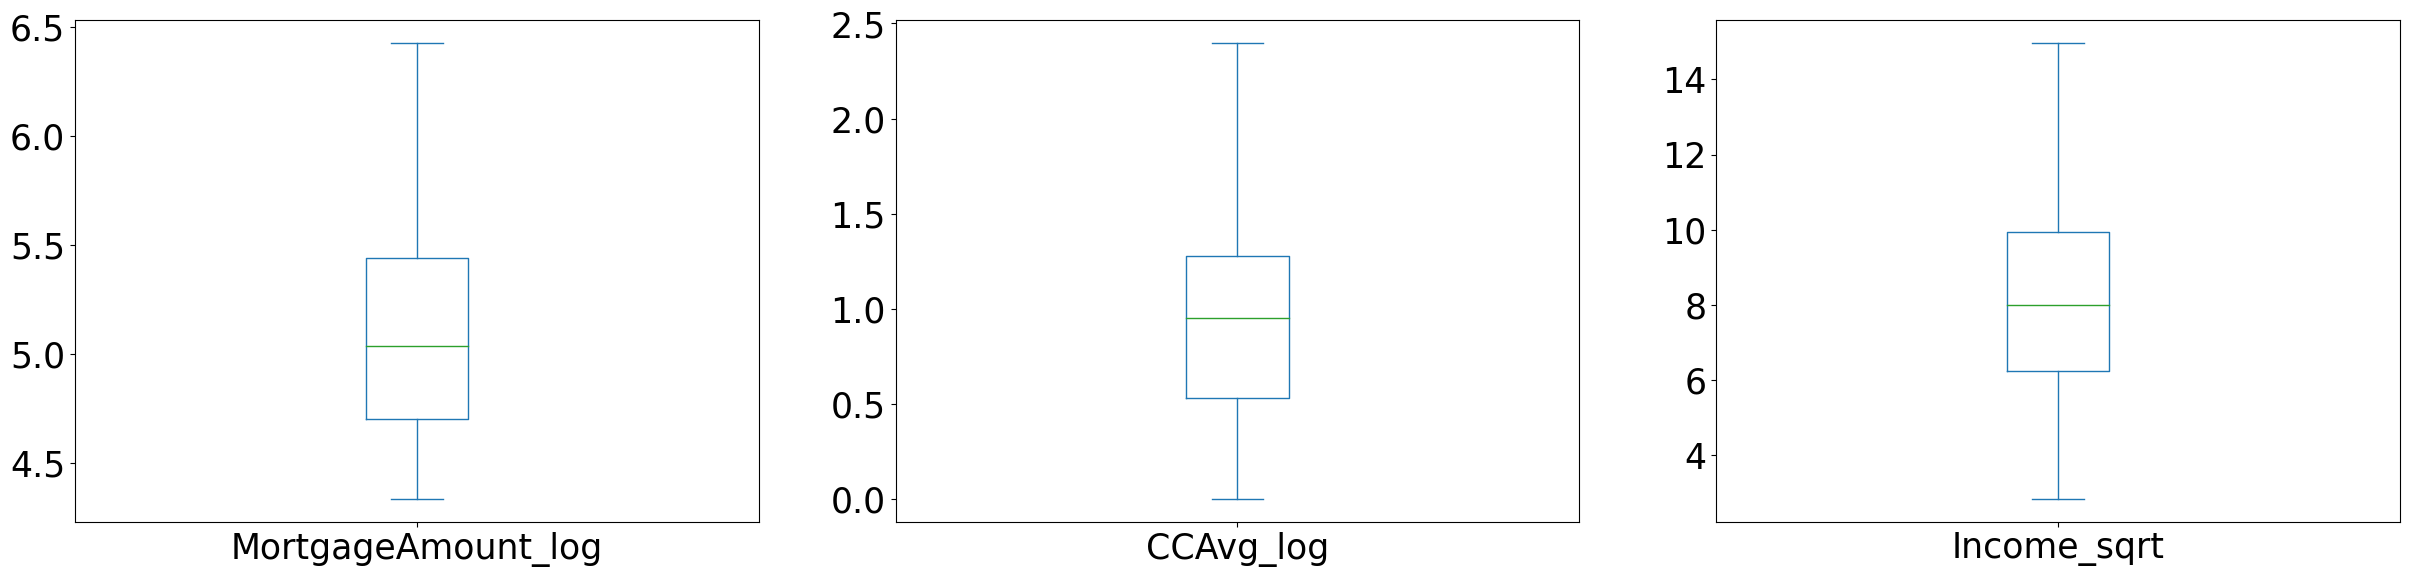

In [ ]:
# Transformed Boxplots
trans_num.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(30,30), fontsize = 25)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

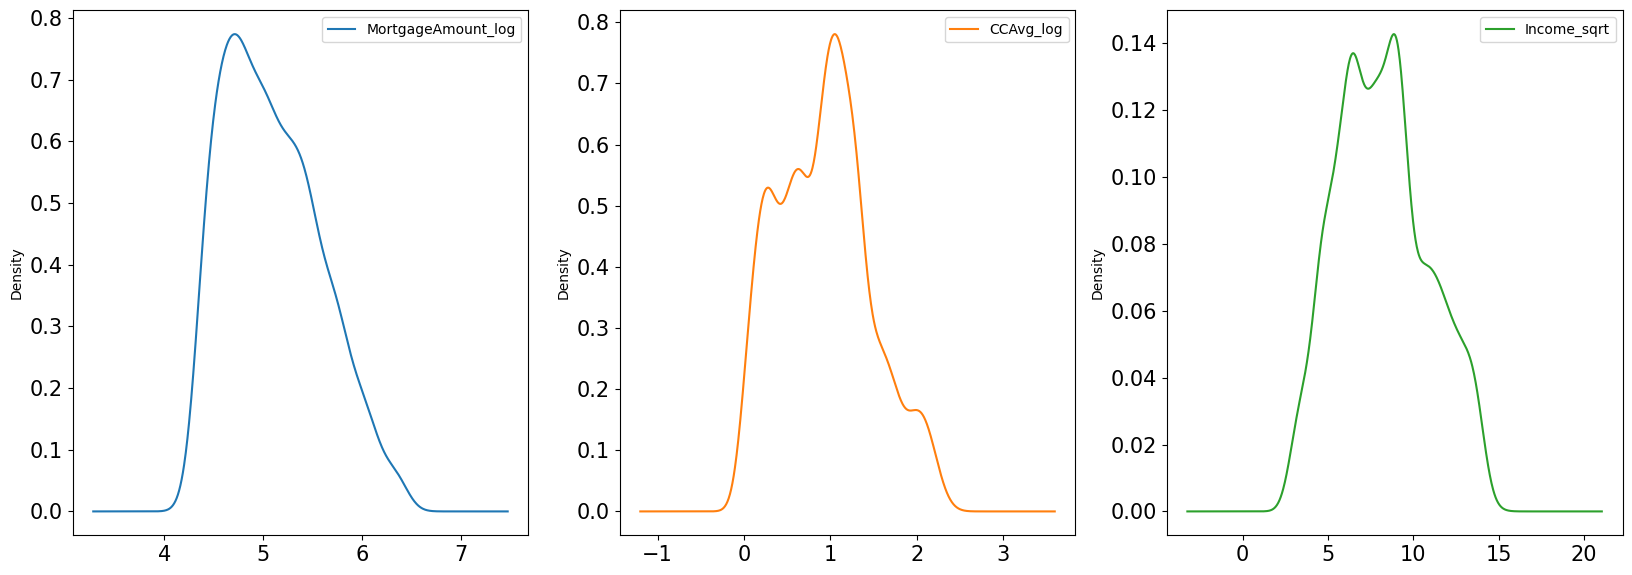

In [ ]:
# Transformed density plots
trans_num.plot(kind = 'density', subplots = True, layout = (2,3), sharex = False, sharey = False, figsize=(20,15), fontsize = 15)

The figures confirm that the transformations have been successful.

# Exploratory Data Analysis (EDA)

Our target variable: **Personal loan** (Did this customer accept the personal loan offered in the last campaign?)

*   0 representing "no", and 1 representing "yes"
*   conversion = sale of a personal loan product to an existing liability customer




In [ ]:
# Summarize target variable
df["Personal Loan"].value_counts()

0    4019
1     480
Name: Personal Loan, dtype: int64

In [ ]:
# Previous marketing efforts were able to garner a roughly 10% conversion rate, therefore the proportion of Personal Loan is:
df["Personal Loan"].value_counts(normalize = True) * 100

0    89.330962
1    10.669038
Name: Personal Loan, dtype: float64

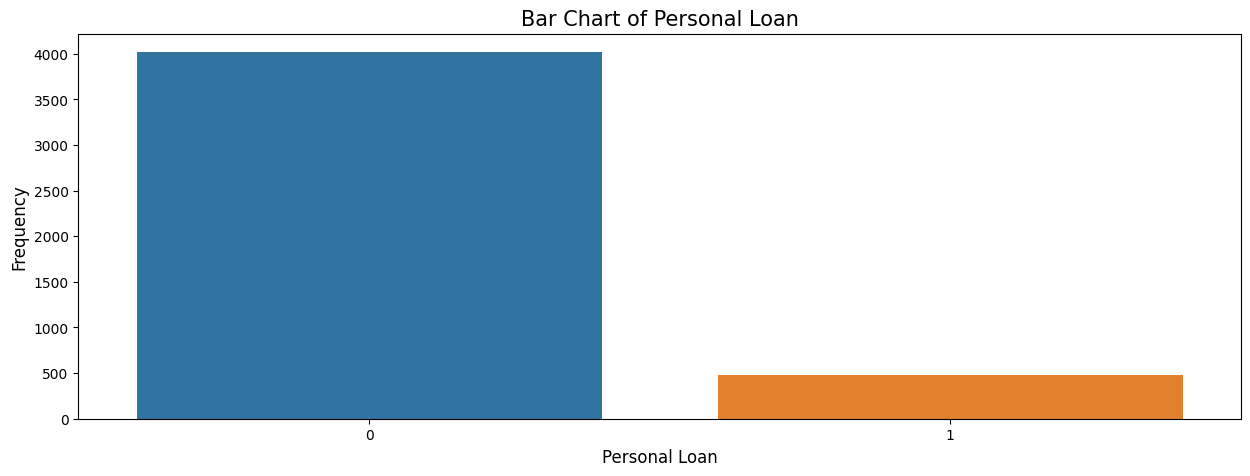

In [ ]:
# Bar chart of target variable
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='Personal Loan')
plt.title('Bar Chart of Personal Loan', fontsize=15)
plt.xlabel('Personal Loan', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

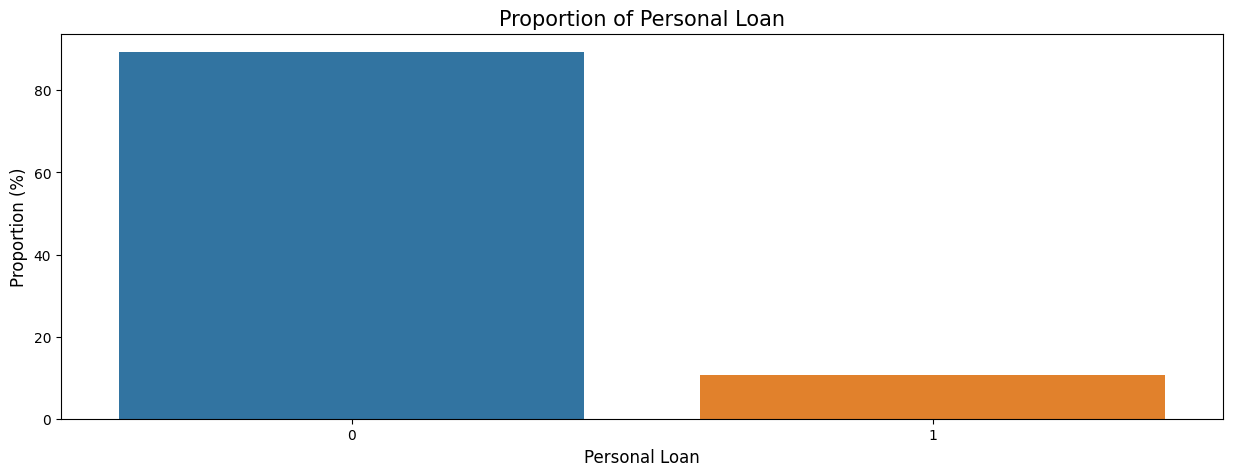

In [ ]:
# Proportion of Personal Loan
PL_proportion = df['Personal Loan'].value_counts(normalize=True) * 100
plt.figure(figsize=(15, 5))
sns.barplot(x=PL_proportion.index, y=PL_proportion.values)
plt.title('Proportion of Personal Loan', fontsize=15)
plt.xlabel('Personal Loan', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.show()

In [ ]:
# Crosstabulation of target variable with other categorical variables
categorical_variables = ['Family', 'Brokerage Account', 'GIC Account', 'Online', 'CreditCard']

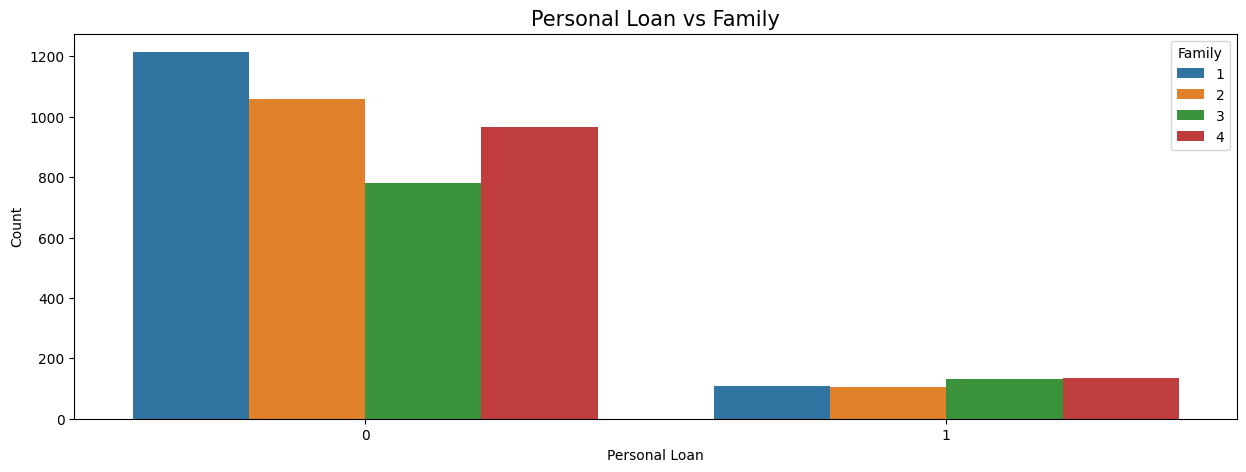

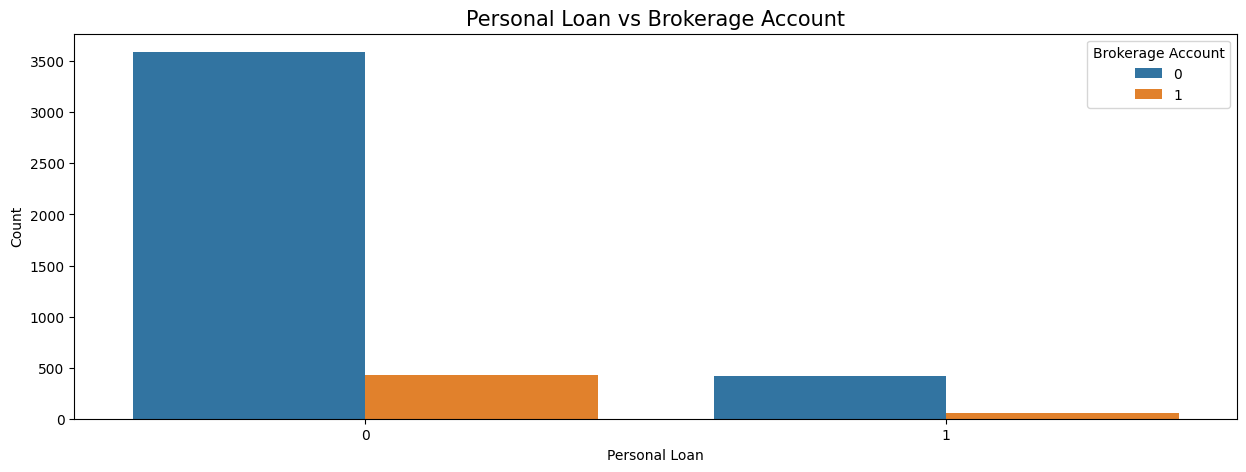

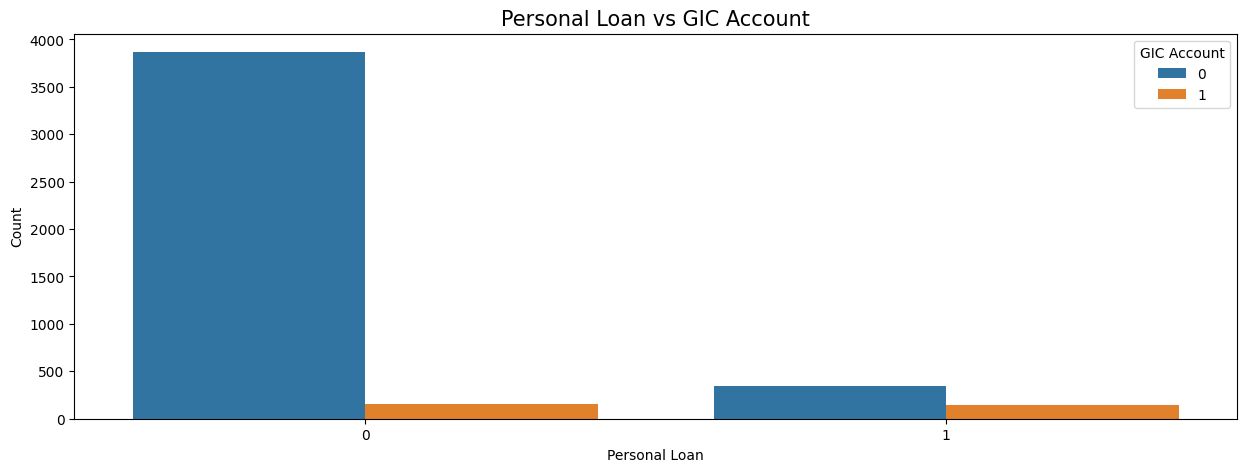

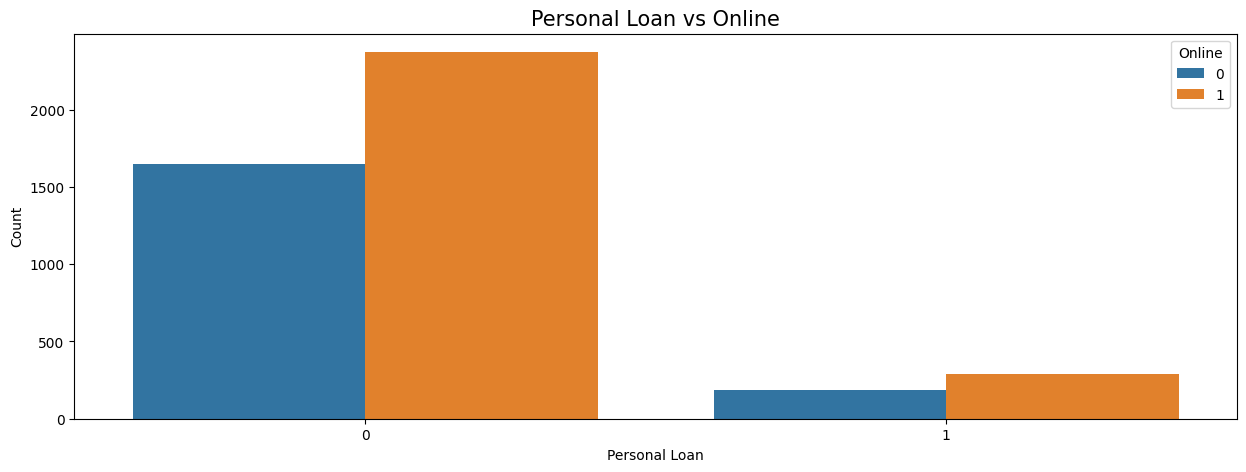

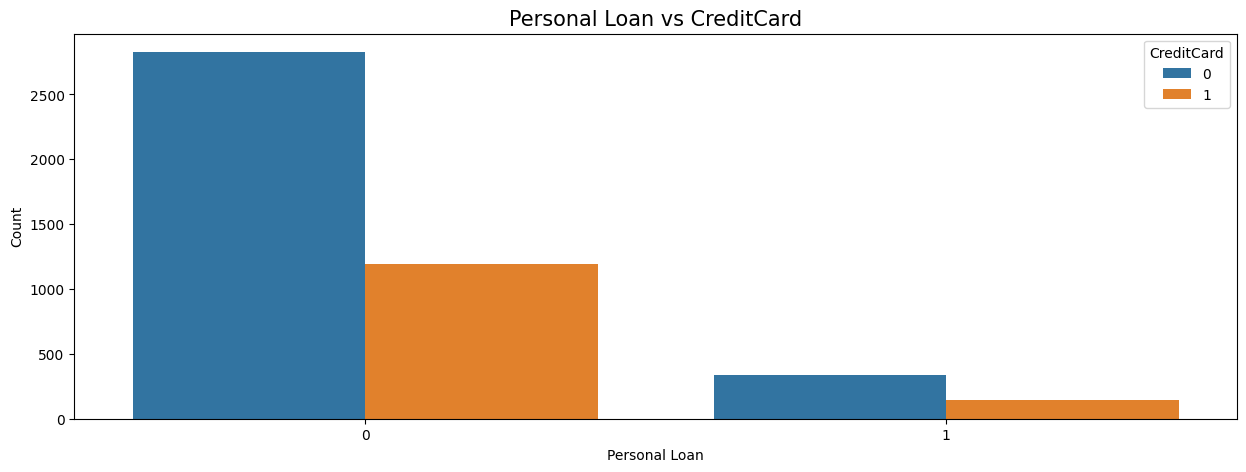

In [ ]:
# Relationship between target variable and other independent categorical variables
for variable in categorical_variables:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x='Personal Loan', hue=variable)
    plt.title(f'Personal Loan vs {variable}', fontsize=15)
    plt.xlabel('Personal Loan', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.legend(title=variable, loc='upper right')
    plt.show()

In [ ]:
# Cross tabulations between target variable and independent categorical variables
for variable in categorical_variables:
    cross_tab = pd.crosstab(df['Personal Loan'], df[variable])
    print(f"Cross-tabulation: Personal Loan vs {variable}\n")
    print(cross_tab)
    print("\n")

Cross-tabulation: Personal Loan vs Family

Family            1     2    3    4
Personal Loan                      
0              1214  1059  781  965
1               107   106  133  134


Cross-tabulation: Personal Loan vs Brokerage Account

Brokerage Account     0    1
Personal Loan               
0                  3590  429
1                   420   60


Cross-tabulation: Personal Loan vs GIC Account

GIC Account       0    1
Personal Loan           
0              3867  152
1               340  140


Cross-tabulation: Personal Loan vs Online

Online            0     1
Personal Loan            
0              1646  2373
1               189   291


Cross-tabulation: Personal Loan vs CreditCard

CreditCard        0     1
Personal Loan            
0              2827  1192
1               337   143




**Family:**

It appears from the customers that rejected personal loans,a family size of 1 represent the highest whereas a family size of 4 represents the lowest. However, it is the opposite for customers that have acquired personal loans whereby a family size of 1 represent the lowest and a family size of 4 represent the highest.

**Brokerage:**

Customers without a brokerage account have a higher frequency of not taking a personal loan than those that do have a brokerage account.The same applies for customers that do have a brokerage account. However, customers with a brokerage account have a much lower freqeuncy than those that do have a brokerage account.

**GIC Account:**

Customers without a Guaranteed Investment Certificate (GIC) account have a higher frequency of not taking a personal loan. Also, customers with a GIC account have a higher frequency of not taking a personal loan compared to those without.

**Online:**

Customers who use internet banking facilities have a higher frequency of not taking a personal loan. However, there is still a significant frequency of customers who use internet banking facilities that took a personal loan.

**CreditCard:**

Customers who use a credit card issued by the bank have a higher frequency of not taking a personal loan. However, there is still a significant frequency of customers with a credit card who took a personal loan.

In [ ]:
# Subset of numerical variables (including the transformed variables)
new_num = df[['Age', 'Experience', 'Income_sqrt','CCAvg_log', 'MortgageAmount_log']]

In [ ]:
# Calculate the mean and standard deviation for each numeric variable based on the target variable
for variable in new_num:
    loan_mean = df.groupby('Personal Loan')[variable].mean()
    loan_std = df.groupby('Personal Loan')[variable].std()
    print(f"Numeric Variable: {variable}")
    print("Mean:")
    print(loan_mean)
    print("Standard Deviation:")
    print(loan_std)
    print("\n")

Numeric Variable: Age
Mean:
Personal Loan
0    45.292361
1    45.066667
Name: Age, dtype: float64
Standard Deviation:
Personal Loan
0    11.439514
1    11.590964
Name: Age, dtype: float64


Numeric Variable: Experience
Mean:
Personal Loan
0    20.066434
1    19.843750
Name: Experience, dtype: float64
Standard Deviation:
Personal Loan
0    11.419958
1    11.582443
Name: Experience, dtype: float64


Numeric Variable: Income_sqrt
Mean:
Personal Loan
0     7.745420
1    11.954832
Name: Income_sqrt, dtype: float64
Standard Deviation:
Personal Loan
0    2.429035
1    1.353383
Name: Income_sqrt, dtype: float64


Numeric Variable: CCAvg_log
Mean:
Personal Loan
0    0.867824
1    1.478677
Name: CCAvg_log, dtype: float64
Standard Deviation:
Personal Loan
0    0.501001
1    0.508530
Name: CCAvg_log, dtype: float64


Numeric Variable: MortgageAmount_log
Mean:
Personal Loan
0    5.03398
1    5.53437
Name: MortgageAmount_log, dtype: float64
Standard Deviation:
Personal Loan
0    0.445523
1    0.5395

**Age:**

The average age of customers who did not take a personal loan is approximately 45.29 years, while for customers who took a personal loan the average age is around 45.07 years. The standard deviation of age is similar for both groups.

**Experience:**

The average years of professional experience for customers who did not take a personal loan is approximately 20.07 years , while for customers who took a personal loan, the average experience is around 19.84 years. The standard deviation of experience is similar for both groups.

**Income:**

The average income for customers who did not take a personal loan is approximately 7750 USD, while for customers who took a personal loan, the average income is around 11,950 USD. The standard deviation of the income is higher for those that did not acquire a personal loan (approximately 2,430 USD)  compared to those that took a personal loan (approximately 1,350 USD), indicating greater variability in income for customers who did not take a personal loan.

**CCAvg:**

The average spending on credit cards per month (CCAvg) for customers who did not take a personal loan is approximately 870 USD, while for customers who took a personal loan, the average is around 1,480 USD. The standard deviation is similar for both groups.

**Mortgage:**

The average mortgagefor customers who did not take a personal loan is approximately 5,030 USD, while for customers who took a personal loan, the average mortgage is around 5,530 USD. The standard deviation of the mortgage of customers that took on a personal loan is approximately 540 USD compared to those that did not take on a personal loan which is approximately 450 USD, indicating greater variability in mortgages for customers who took a personal loan.

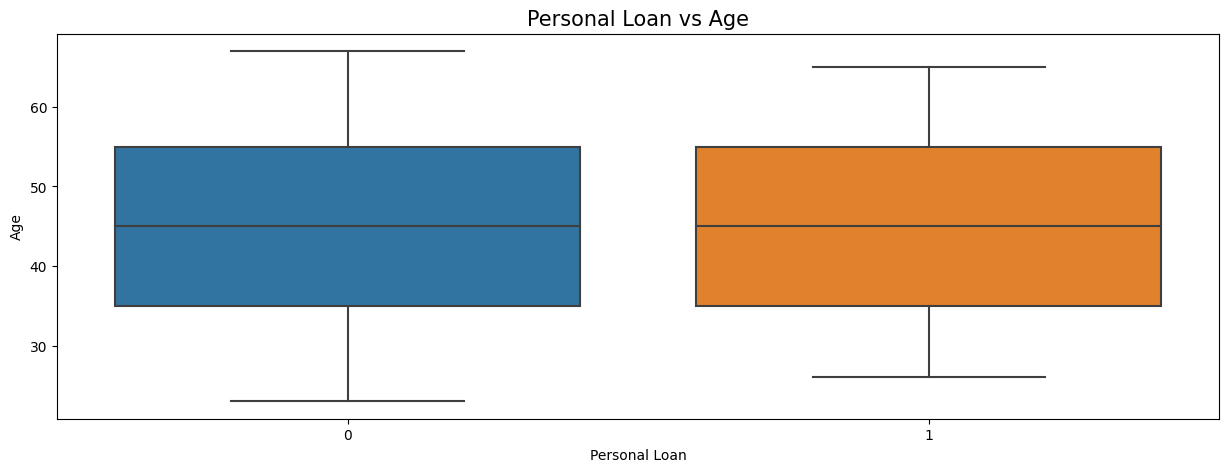

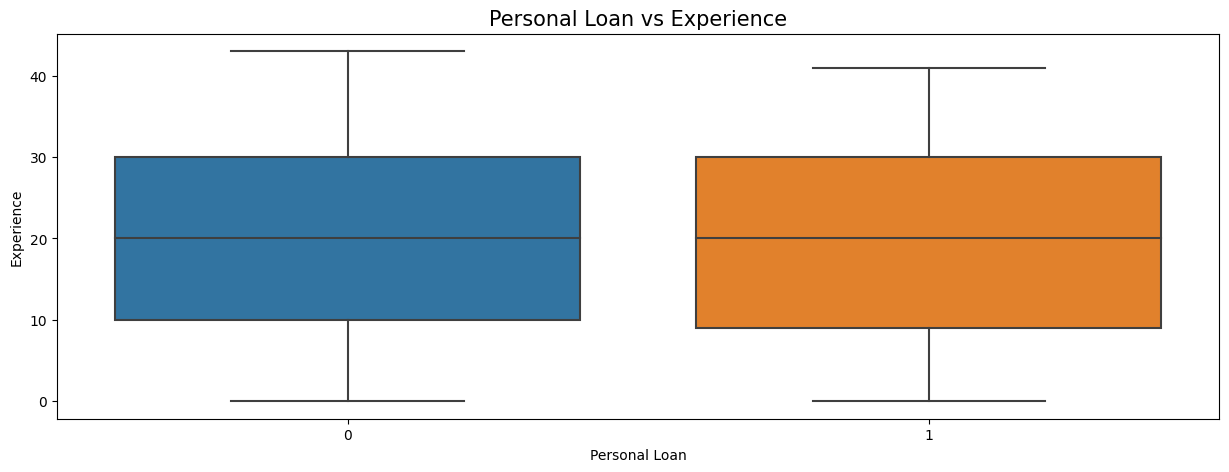

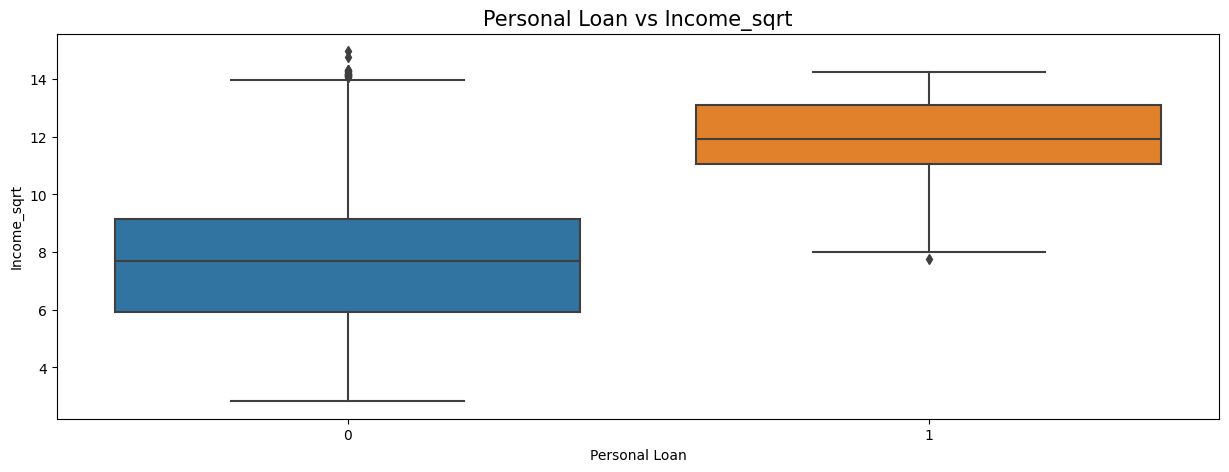

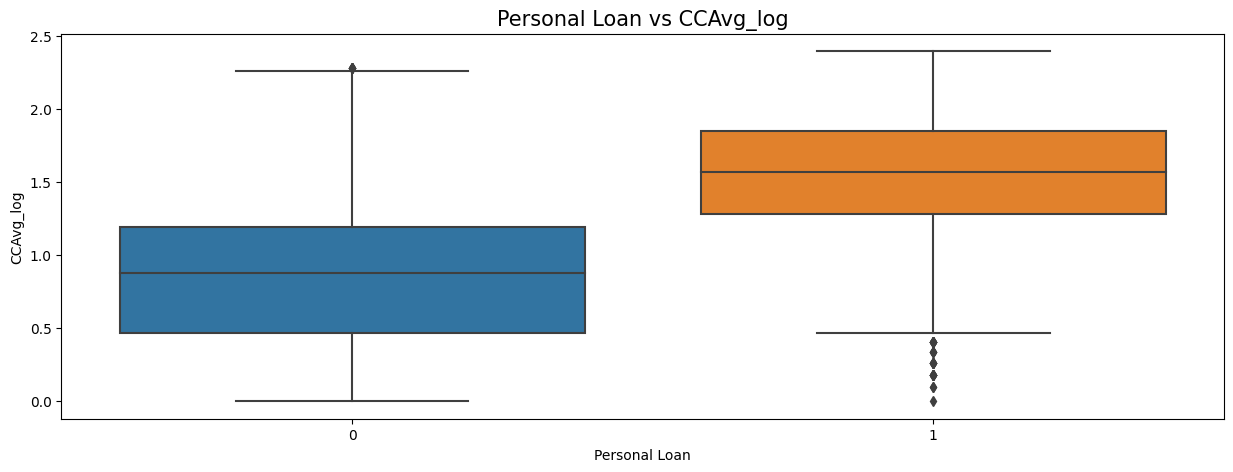

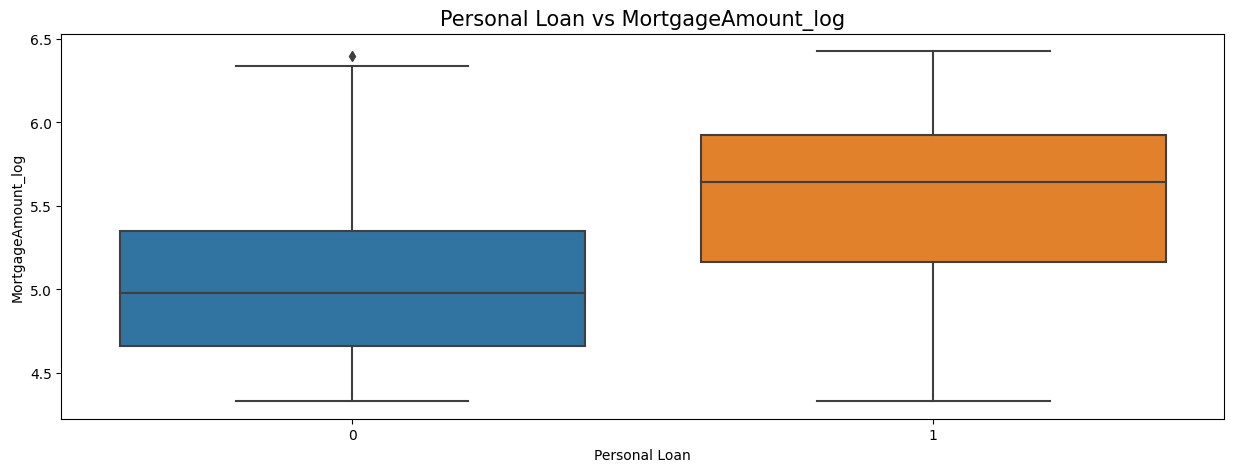

In [ ]:
# Visualize the relationship between target variable and other independent numeric variables
for variable in new_num:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=df, x='Personal Loan', y=variable)
    plt.title(f'Personal Loan vs {variable}', fontsize=15)
    plt.xlabel('Personal Loan', fontsize=10)
    plt.ylabel(variable, fontsize=10)
    plt.show()

In [ ]:
# Create a correlation matrix
correlation_matrix = new_num.corr()
print(correlation_matrix)

                         Age  Experience  Income_sqrt  CCAvg_log  \
Age                 1.000000    0.994201    -0.052853  -0.048534   
Experience          0.994201    1.000000    -0.046054  -0.049138   
Income_sqrt        -0.052853   -0.046054     1.000000   0.613065   
CCAvg_log          -0.048534   -0.049138     0.613065   1.000000   
MortgageAmount_log -0.006589   -0.005212     0.651430   0.358255   

                    MortgageAmount_log  
Age                          -0.006589  
Experience                   -0.005212  
Income_sqrt                   0.651430  
CCAvg_log                     0.358255  
MortgageAmount_log            1.000000  


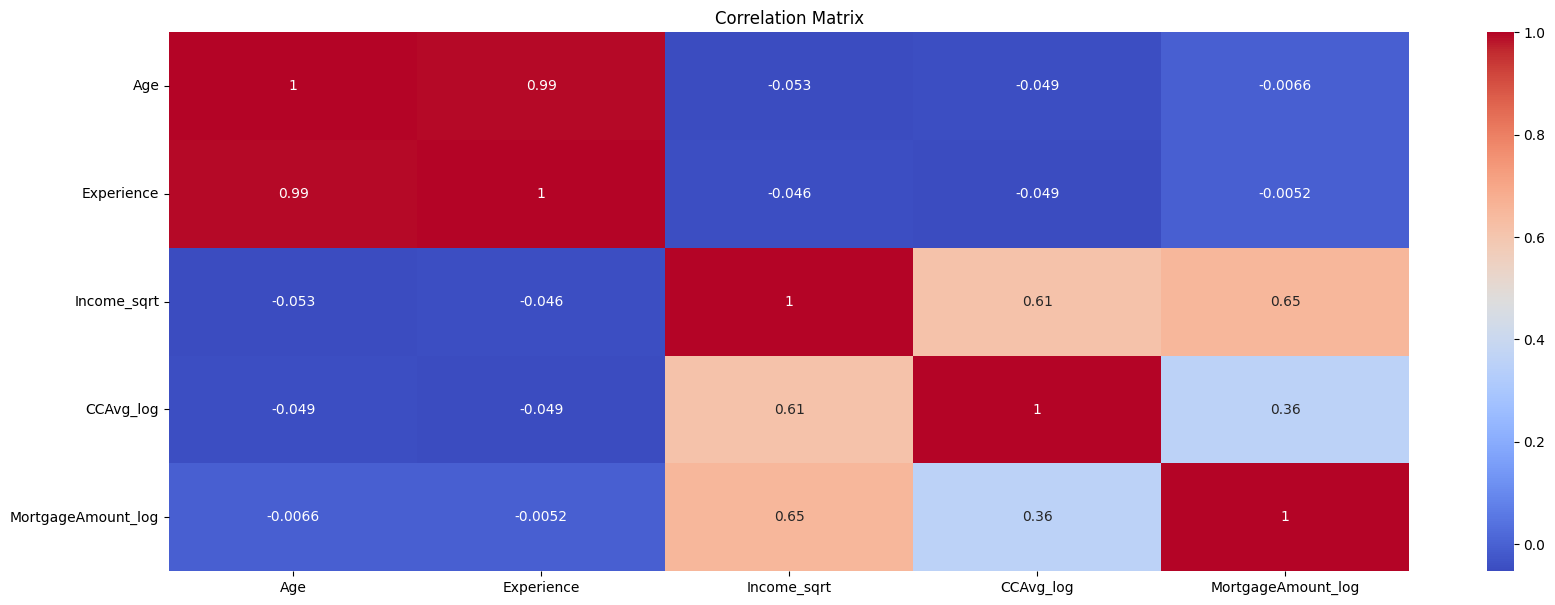

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(20,7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Age and Experience exhibit a strong positive correlation which makes sense since the older you are, the more experience you will likely have.

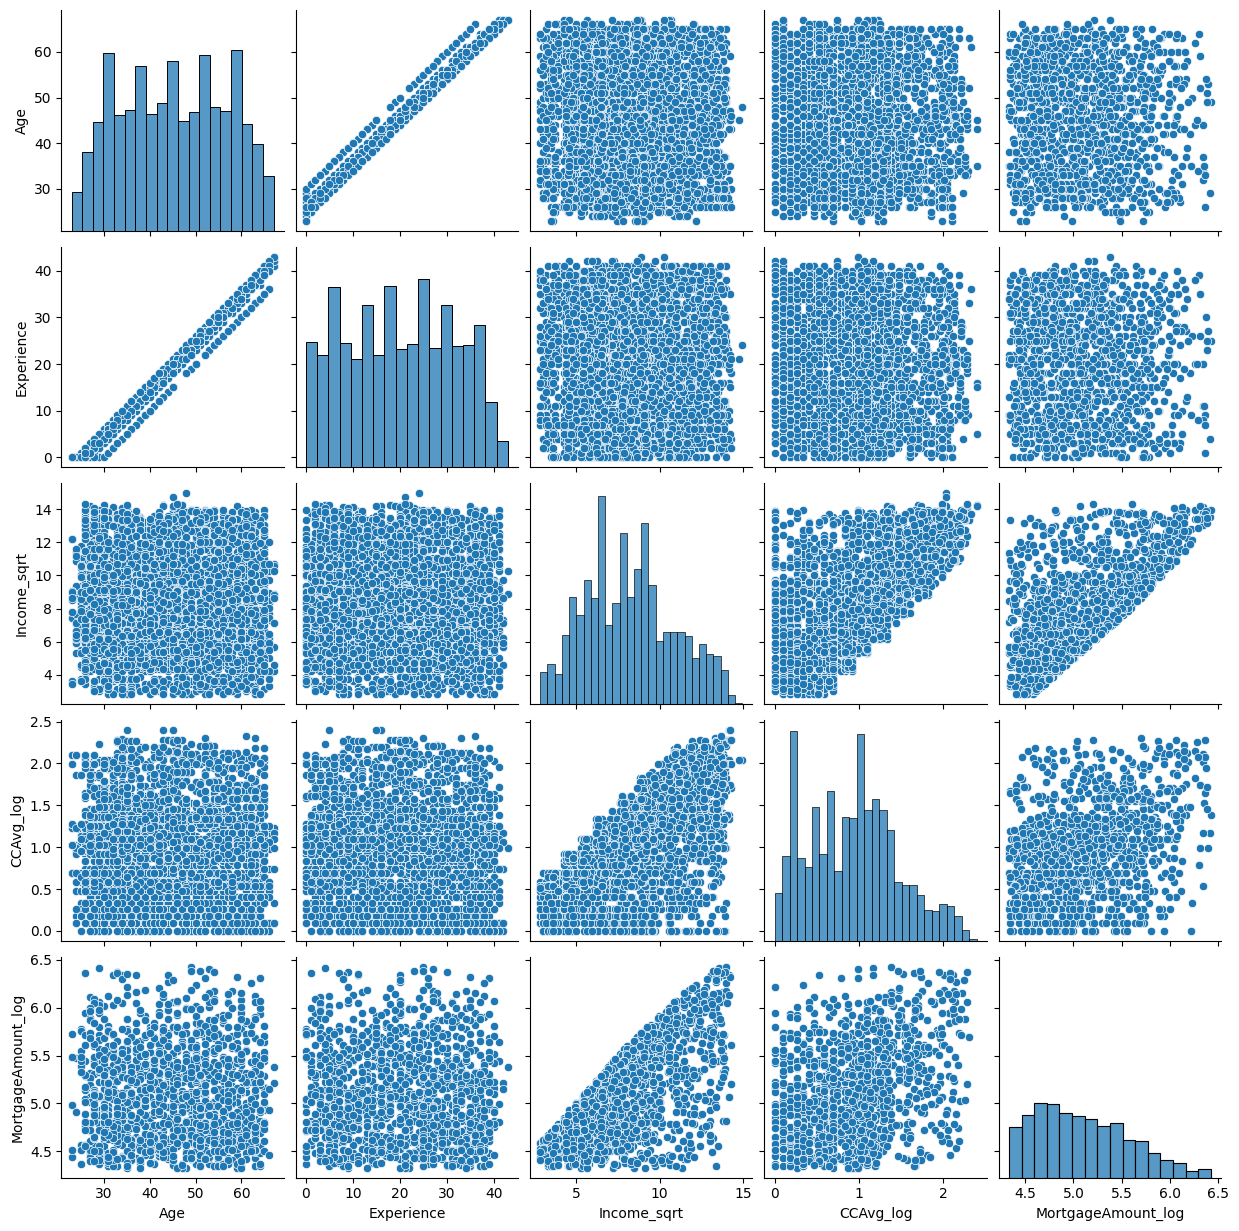

<Figure size 1000x400 with 0 Axes>

In [ ]:
# Create the scatterplot matrix
sns.pairplot(new_num)
plt.figure(figsize=(10,4))
plt.show()

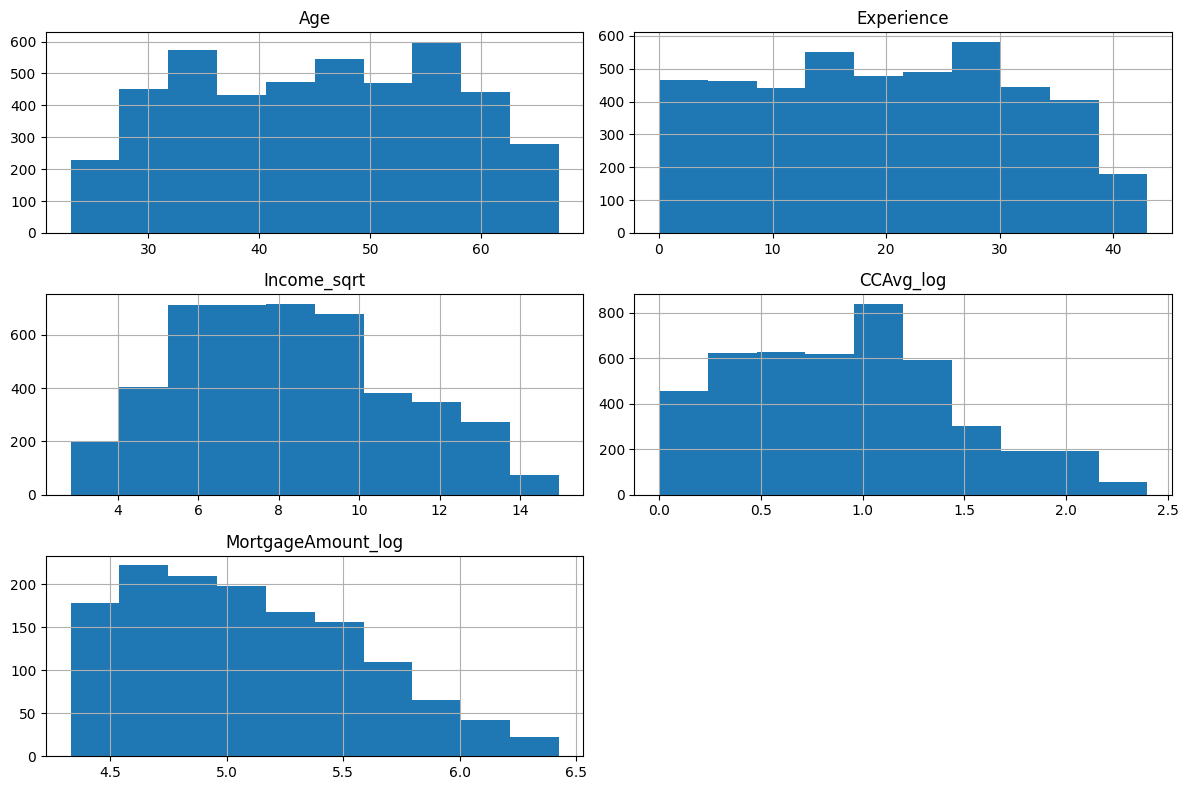

In [ ]:
# Histogram of numeric variables
new_num.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
# Summarize categorical variables
categorical_stats = df.describe(include="object")
print("\nDescriptive Statistics for Categorical Variables:\n", categorical_stats)


Descriptive Statistics for Categorical Variables:
          Branch Address    Advisor Name Advisor Designation  \
count              4499            4499                4499   
unique               43              49                   2   
top     24 Trusel Court  Donetta Mallet                 PFP   
freq                159             111                3386   

          Branch Address 1 Branch Address 2       Branch Address 3  
count                 4499             4499                   4499  
unique                  42               42                     42  
top     7919 Cedarwood Dr.     1 Poplar St.  177 Winchester Street  
freq                   206              206                    196  


 Donetta Mallet deals with the most customers. Customers deal with personal financial planners (PFPs) more than certified financial planners (CFPs).

# Business Analytics
Who is or are the most successful financial advisor(s)?

Determining the most successful financial advisor(s) can be subjective and depends on how "success" is defined. There are multiple criterion we can use to evaluate an advisor's success:

*   Conversion Rate: An advisor is successful if they have a high conversion rate  i.e., the ratio of the number of personal loan sales to the total number of customers they served. This metric indicates the ability to effectively convince and convert customers into personal loan buyers.

*   Customer Satisfaction: Financial advisors who receive positive feedback and have high customer satisfaction scores can be considered successful in terms of providing quality service and maintaining strong relationships.

*   Revenue: Financial advisors who generate higher revenue through personal loan sales would be considered successful. This metric considers both the conversion rate and the value of the personal loan products.

However, since we do not have any data to use for assessing customer satisfaction nor any data pertaining to revenue we shall determine the most succesful advisor based on the conversion rate metric.

In [ ]:
# Count the number of personal loan sales per financial advisor
loan_sales = df.groupby('Advisor Name')['Personal Loan'].sum()
print(loan_sales)

Advisor Name
Aleida Suitt          11
Beatriz Rolf          10
Bernarda Guilliams     9
Berry Gartman          6
Brandon Sum           10
Caitlin Wimmer         6
Carolin Whitmire       5
Carylon Race          12
Cecil Caves           11
Collene Dubon          7
Corazon Eastin        13
Cyndy Calcagno        11
Cyril Murry           10
Deedra Halderman       6
Donetta Mallet        12
Elicia Schuyler       10
Erik Clinard          12
Estefana Dungan        8
Eulah Kicklighter     12
Gala Mackson           8
Gita Pinelli          16
Jacqueline Leveque    14
Jaquelyn Cubbage      12
Jodie Izquierdo       11
Kathaleen Horgan      15
Kirsten Mitchem       10
Kristle Hanby          6
Latrisha Barden       10
Marcelene Thomson      7
Margret Lan            9
Mariana Ghent         11
Marylee Bristow        6
Myesha Bromley         5
Pansy Diblasi          9
Pete Dickens           9
Prudence Masters      15
Ross Seipel            6
Siobhan Flaugher      12
Tanya Johansen         9
Taylor Kemp 

In [ ]:
# Find the advisor with the highest loan sales
highest_loan_sales = loan_sales.max()
highest_loan_advisor = loan_sales.idxmax()
print("Advisor with the highest loan sales:", highest_loan_advisor,":",highest_loan_sales)

Advisor with the highest loan sales: Gita Pinelli : 16


It appears that Gita Pinelli has sold the most personal loans to customers.

In [ ]:
# Count the total number of customers served by each advisor
total_customers = df.groupby('Advisor Name')['Personal Loan'].count()
print(total_customers)

Advisor Name
Aleida Suitt           94
Beatriz Rolf           92
Bernarda Guilliams    104
Berry Gartman          77
Brandon Sum            96
Caitlin Wimmer         98
Carolin Whitmire       94
Carylon Race           88
Cecil Caves            99
Collene Dubon          84
Corazon Eastin         94
Cyndy Calcagno        105
Cyril Murry            95
Deedra Halderman      109
Donetta Mallet        111
Elicia Schuyler        77
Erik Clinard           96
Estefana Dungan        88
Eulah Kicklighter      81
Gala Mackson           91
Gita Pinelli          105
Jacqueline Leveque     98
Jaquelyn Cubbage       83
Jodie Izquierdo        81
Kathaleen Horgan       94
Kirsten Mitchem        99
Kristle Hanby          91
Latrisha Barden        92
Marcelene Thomson     101
Margret Lan            84
Mariana Ghent          93
Marylee Bristow       100
Myesha Bromley         75
Pansy Diblasi          79
Pete Dickens           97
Prudence Masters       82
Ross Seipel            89
Siobhan Flaugher       89

In [ ]:
# Find the advisor with the highest number of customers
highest_customers = total_customers.max()
highest_customers_advisor = total_customers.idxmax()
print("Advisor with the most customers served:", highest_customers_advisor,":",highest_customers)

Advisor with the most customers served: Donetta Mallet : 111


It appears that Donetta Mallet has served the most customers. Note that this was identified in the EDA section of the report.

In [ ]:
# Compute the conversion rate
conversion_rate = loan_sales / total_customers
print(conversion_rate)

Advisor Name
Aleida Suitt          0.117021
Beatriz Rolf          0.108696
Bernarda Guilliams    0.086538
Berry Gartman         0.077922
Brandon Sum           0.104167
Caitlin Wimmer        0.061224
Carolin Whitmire      0.053191
Carylon Race          0.136364
Cecil Caves           0.111111
Collene Dubon         0.083333
Corazon Eastin        0.138298
Cyndy Calcagno        0.104762
Cyril Murry           0.105263
Deedra Halderman      0.055046
Donetta Mallet        0.108108
Elicia Schuyler       0.129870
Erik Clinard          0.125000
Estefana Dungan       0.090909
Eulah Kicklighter     0.148148
Gala Mackson          0.087912
Gita Pinelli          0.152381
Jacqueline Leveque    0.142857
Jaquelyn Cubbage      0.144578
Jodie Izquierdo       0.135802
Kathaleen Horgan      0.159574
Kirsten Mitchem       0.101010
Kristle Hanby         0.065934
Latrisha Barden       0.108696
Marcelene Thomson     0.069307
Margret Lan           0.107143
Mariana Ghent         0.118280
Marylee Bristow       0.06

In [ ]:
# Find the advisor with the highest conversion rate
highest_conversion = conversion_rate.max()
highest_conversion_advisor = conversion_rate.idxmax()
print("Advisor with the highest conversion rate:", highest_conversion_advisor,":",highest_conversion)

Advisor with the highest conversion rate: Prudence Masters : 0.18292682926829268


**Prudence Masters** is the most succesful financial advisor since she boasts the highest conversion rate (18.29%).

# Machine Learning

In [ ]:
# Import libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
# Identify the target variable and its predictors (aka features)
X = df.drop('Personal Loan', axis=1)  # predictors
y = df['Personal Loan']  # Target variable

In [ ]:
# Partition the data into training(75%) and test(25%) splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Initialize and train the machine learing models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
naive_bayes = GaussianNB()

In [ ]:
# Identify categorical columns
categorical_columns_ml = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Convert categorical columns into numerical values using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns_ml)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns_ml)

In [ ]:
# Create an imputer with the desired strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

In [ ]:
# Fit the models to the imputed training data
logistic_regression.fit(X_train_imputed, y_train)
decision_tree.fit(X_train_imputed, y_train)
random_forest.fit(X_train_imputed, y_train)
gradient_boosting.fit(X_train_imputed, y_train)
svm.fit(X_train_imputed, y_train)
knn.fit(X_train_imputed, y_train)
lda.fit(X_train_imputed, y_train)
naive_bayes.fit(X_train_imputed, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [ ]:
# Render predictions on the test data
logistic_regression_pred = logistic_regression.predict(X_test_imputed)
decision_tree_pred = decision_tree.predict(X_test_imputed)
random_forest_pred = random_forest.predict(X_test_imputed)
gradient_boosting_pred = gradient_boosting.predict(X_test_imputed)
svm_pred = svm.predict(X_test_imputed)
knn_pred = knn.predict(X_test_imputed)
lda_pred = lda.predict(X_test_imputed)
naive_bayes_pred = naive_bayes.predict(X_test_imputed)

In [ ]:
# Evaluate the performace of each model and determine the best model(s)
print("Logistic Regression:")
print(classification_report(y_test, logistic_regression_pred))

print("Decision Tree:")
print(classification_report(y_test, decision_tree_pred))

print("Random Forest:")
print(classification_report(y_test, random_forest_pred))

print("Gradient Boosting:")
print(classification_report(y_test, gradient_boosting_pred))

print("SVM:")
print(classification_report(y_test, svm_pred))

print("KNN:")
print(classification_report(y_test, knn_pred))

print("Linear Discriminant Analysis:")
print(classification_report(y_test, lda_pred))

print("Naive Bayes:")
print(classification_report(y_test, naive_bayes_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1005
           1       0.64      0.49      0.56       120

    accuracy                           0.92      1125
   macro avg       0.79      0.73      0.76      1125
weighted avg       0.91      0.92      0.91      1125

Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1005
           1       0.74      0.68      0.70       120

    accuracy                           0.94      1125
   macro avg       0.85      0.82      0.84      1125
weighted avg       0.94      0.94      0.94      1125

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1005
           1       0.91      0.59      0.72       120

    accuracy                           0.95      1125
   macro avg       0.93      0.79      0.84      1125
weighted avg       0.95

Based on these results, the Random Forest model is the best model. It achieves the highest accuracy of 0.95 and demonstrates relatively good precision, recall, and F1-score for the customers who took the personal loan (1).

The following is simply a tabulation of the results so that the reader of this report will have an easier time comparing the result of each models' performance:

In [ ]:
# Define the model names
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Linear Discriminant Analysis', 'Naive Bayes']

In [ ]:
# Define the classification report results
classification_report_results = [
    {'Model': 'Logistic Regression', 'Accuracy': 0.92, 'Precision (class 1)': 0.64, 'Recall (class 1)': 0.49, 'F1-score (class 1)': 0.56},
    {'Model': 'Decision Tree', 'Accuracy': 0.94, 'Precision (class 1)': 0.74, 'Recall (class 1)': 0.68, 'F1-score (class 1)': 0.70},
    {'Model': 'Random Forest', 'Accuracy': 0.95, 'Precision (class 1)': 0.91, 'Recall (class 1)': 0.59, 'F1-score (class 1)': 0.72},
    {'Model': 'Gradient Boosting', 'Accuracy': 0.95, 'Precision (class 1)': 0.88, 'Recall (class 1)': 0.58, 'F1-score (class 1)': 0.70},
    {'Model': 'SVM', 'Accuracy': 0.90, 'Precision (class 1)': 0.73, 'Recall (class 1)': 0.09, 'F1-score (class 1)': 0.16},
    {'Model': 'KNN', 'Accuracy': 0.90, 'Precision (class 1)': 0.53, 'Recall (class 1)': 0.33, 'F1-score (class 1)': 0.41},
    {'Model': 'Linear Discriminant Analysis', 'Accuracy': 0.91, 'Precision (class 1)': 0.59, 'Recall (class 1)': 0.53, 'F1-score (class 1)': 0.56},
    {'Model': 'Naive Bayes', 'Accuracy': 0.64, 'Precision (class 1)': 0.17, 'Recall (class 1)': 0.60, 'F1-score (class 1)': 0.26}
]

In [ ]:
# Create a DataFrame from the classification report results
df_results = pd.DataFrame(classification_report_results)
df_results.set_index('Model', inplace=True)
print(df_results)

                              Accuracy  Precision (class 1)  Recall (class 1)  \
Model                                                                           
Logistic Regression               0.92                 0.64              0.49   
Decision Tree                     0.94                 0.74              0.68   
Random Forest                     0.95                 0.91              0.59   
Gradient Boosting                 0.95                 0.88              0.58   
SVM                               0.90                 0.73              0.09   
KNN                               0.90                 0.53              0.33   
Linear Discriminant Analysis      0.91                 0.59              0.53   
Naive Bayes                       0.64                 0.17              0.60   

                              F1-score (class 1)  
Model                                             
Logistic Regression                         0.56  
Decision Tree                       

This marks the conclusion of the report. I hope these findings will aid the bank in making better decisions for the future. Thank you for reading.

***Done by: Wassim Radwan***